## Week 6
### From Ernest Ryu at SNU
For ease of illustration, we will use simple 2D functions in our examples. The first function is the Rosenbrock function

$$
f(x,y)=
(1-x)^2+5(y-x^2)^2
$$

The Rosenbrock function is non-convex, but it has a unique local minimum that is the global minimum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%matplotlib qt

In [2]:
def rosenbrock(x, y):
    return (1-x)**2+5*(y-x**2)**2

In [3]:
N = 32
xlist = np.linspace(-2.0, 2.0, N)
ylist = np.linspace(-1.0, 3.0, N)
X, Y = np.meshgrid(xlist, ylist)
# Z = np.sqrt(X**2 + Y**2)
Z = rosenbrock(X,Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 300, cmap='RdGy')
cbar = fig.colorbar(CS)
ax.plot(1, 1, '*', color='#2774AE', markersize=10)

plt.title('Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N = 32
X, Y = np.meshgrid(np.linspace(-2.0, 2.0, N), np.linspace(-1.0, 3.0, N))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, rosenbrock(X, Y), rstride=1, cstride=1, cmap=cm.jet,
         linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function value')
plt.show()

## Gradient of $f$

$$
\nabla f(x,y)=
\begin{bmatrix}
2(x-1)+20x(x^2-y)\\
10(y-x^2)
\end{bmatrix}
$$

In [57]:
def rosen_grad(x, y):
    return np.array((2*(x-1)+20*(x**2-y)*x, 10*(y-x**2)))


N = 32
xlist = np.linspace(-2.0, 2.0, N)
ylist = np.linspace(-1.0, 3.0, N)
X, Y = np.meshgrid(xlist, ylist)
Z = rosenbrock(X,Y)


fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 300, cmap='RdGy')
cbar = fig.colorbar(CS)
ax.plot(1, 1, '*', color='#2774AE', markersize=10)

plt.title('Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')


# number of steps
M = 100

z_curr = np.array((1.3, 1.1))
# z_curr = np.array((-1,-0.5))

plt.plot(z_curr[0], z_curr[1], 'ko')
step_size = 0.035

for _ in range(M):
    z_curr = z_curr - step_size*rosen_grad(*z_curr)  # unpacking np arrays with *
    plt.plot(z_curr[0], z_curr[1], 'ko')
    plt.pause(0.5)

plt.show()

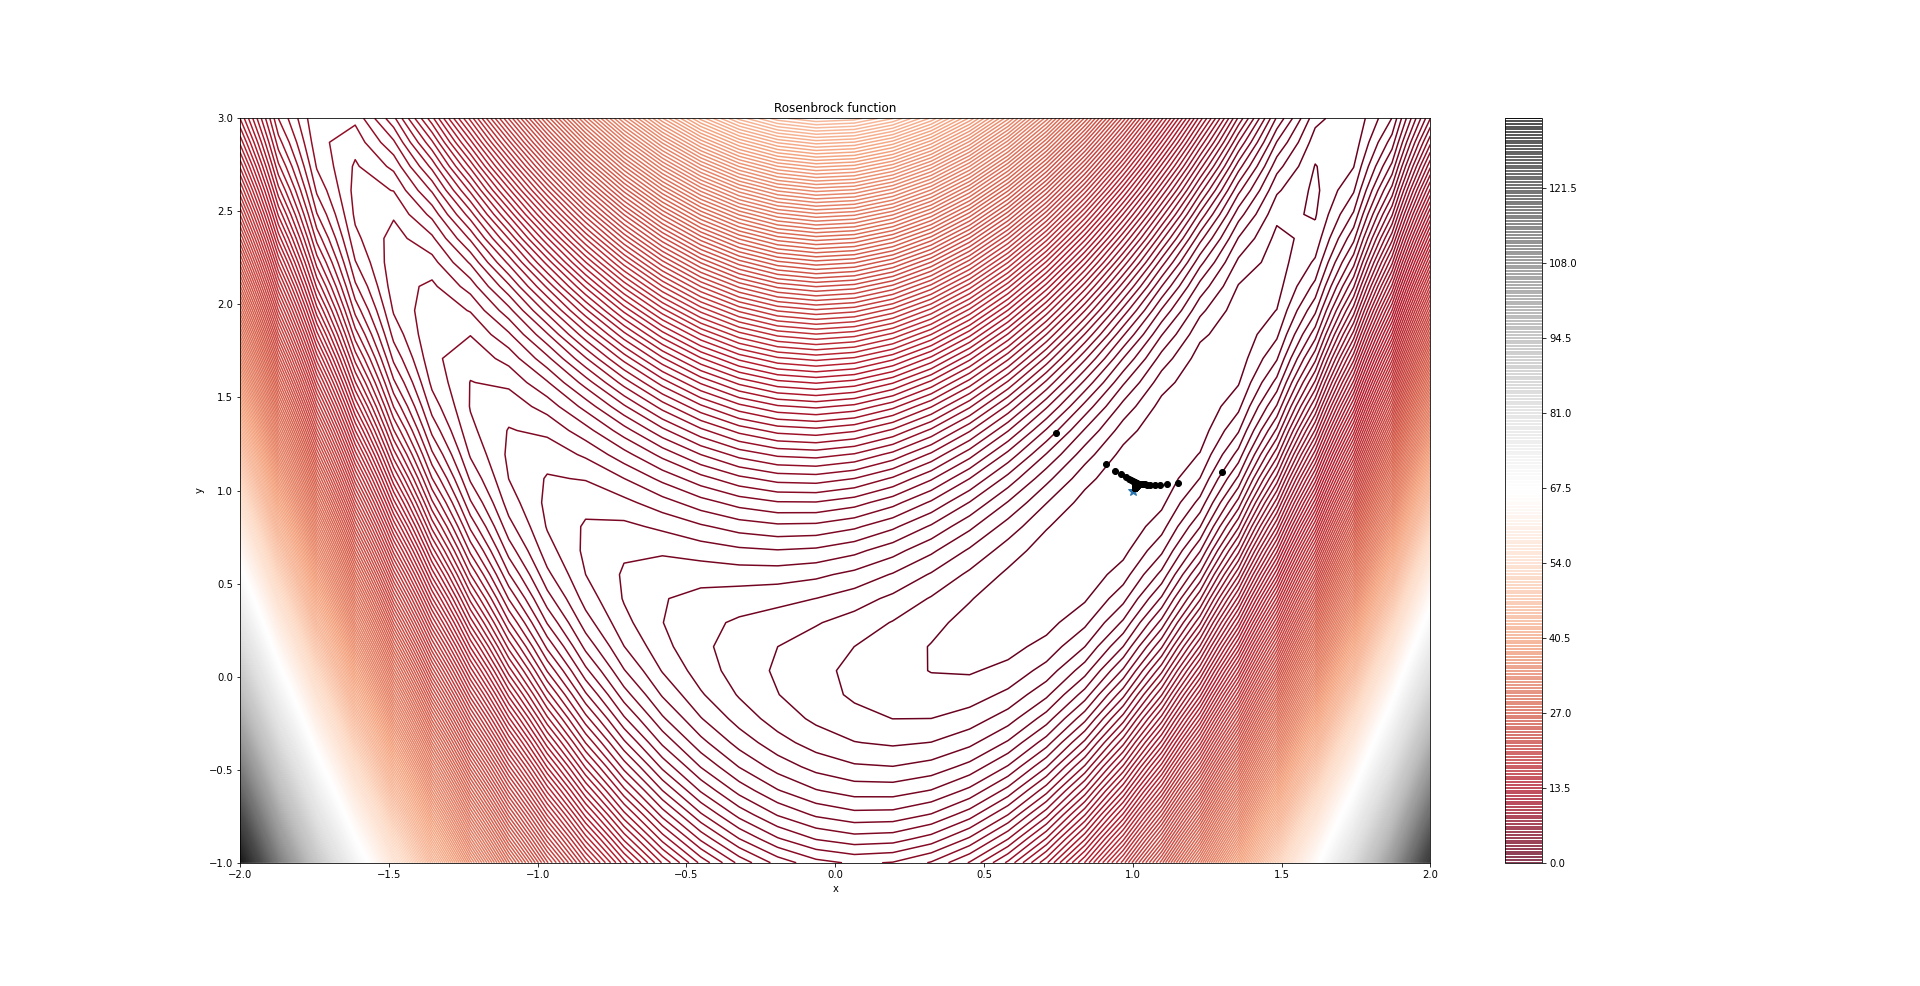

In [59]:
Image("C://Users\이익범\Downloads\Figure_4.png")

## Local minima/maxima

Avoiding local minima/maxima in optimization can be difficult. There is no easy answer. 
The simplest approach is to try many starting points, and the starting points near the global minima/maxima will lead you to the the global minima/maxima.

Consider Mishra's Bird function
$$
f(x,y)=
\sin(x)e^{(1-\cos(y))^2}+\cos(y)e^{(1-\sin(x))^2}+(x-y)^2
$$
which has multiple local minima

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, exp
%matplotlib inline
%matplotlib qt


def mishraBird(x, y):
    return sin(x)*exp((1-cos(y))**2)+cos(y)*exp((1-sin(x))**2)+(x-y)**2


N = 64
XYlim = 10.0;
xlist = np.linspace(-XYlim, XYlim, N)
ylist = np.linspace(-XYlim, XYlim, N)
X, Y = np.meshgrid(xlist, ylist)
Z = mishraBird(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 30, cmap='RdYlBu')
cbar = fig.colorbar(CS)

#Mishra's Bird has 2 global minimas (can be found with lots of hand-calculations)
plt.plot(4.70104, 3.15294,'*',color = '#28B038',markersize=10)
plt.plot(-1.58214, -3.13024,'*',color = '#28B038',markersize=10)


plt.title("Mishra's Bird function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,exp

N = 64

XYlim = 10.0;
xlist = np.linspace(-XYlim, XYlim, N)
ylist = np.linspace(-XYlim, XYlim, N)
X, Y = np.meshgrid(xlist, ylist)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, mishraBird(X, Y), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function value')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,exp

def mishraBird(x, y):
    return sin(x)*exp((1-cos(y))**2)+cos(y)*exp((1-sin(x))**2)+(x-y)**2

def mishraGrad(x, y):
    gx = cos(x)*exp((1-cos(y))**2)+cos(y)*exp((1-sin(x))**2)*2*(1-sin(x))*(-cos(x))+2*(x-y)
    gy = sin(x)*exp((1-cos(y))**2)*2*(1-cos(y))*sin(y)-sin(y)*exp((1-sin(x))**2)+2*(y-x)
    return np.array((gx, gy))


N = 64

XYlim = 10.0
xlist = np.linspace(-XYlim, XYlim, N)
ylist = np.linspace(-XYlim, XYlim, N)
X, Y = np.meshgrid(xlist, ylist)
Z = mishraBird(X,Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 30, cmap='RdYlBu')
cbar = fig.colorbar(CS)
#Mishra's Bird has 2 global minimas (can be found with lots of hand-calculations)
plt.plot(4.70104,3.15294,'*',color = '#28B038',markersize=10)
plt.plot(-1.58214,-3.13024,'*',color = '#28B038',markersize=10)


plt.title("Mishra's Bird function")
plt.xlabel('x')
plt.ylabel('y')


M = 100

#set starting point
#z_curr = np.array((-2.6, 4.5))
z_curr = np.array((7.5, 2.5))
#z_curr = np.array((3, 4.5))

plt.plot(z_curr[0], z_curr[1], 'ko')
step_size = 0.002

for ii in range(M):
    z_curr = z_curr - step_size*mishraGrad(*z_curr)
    plt.plot(z_curr[0], z_curr[1], 'ko')
    
    plt.pause(0.01)

plt.show()

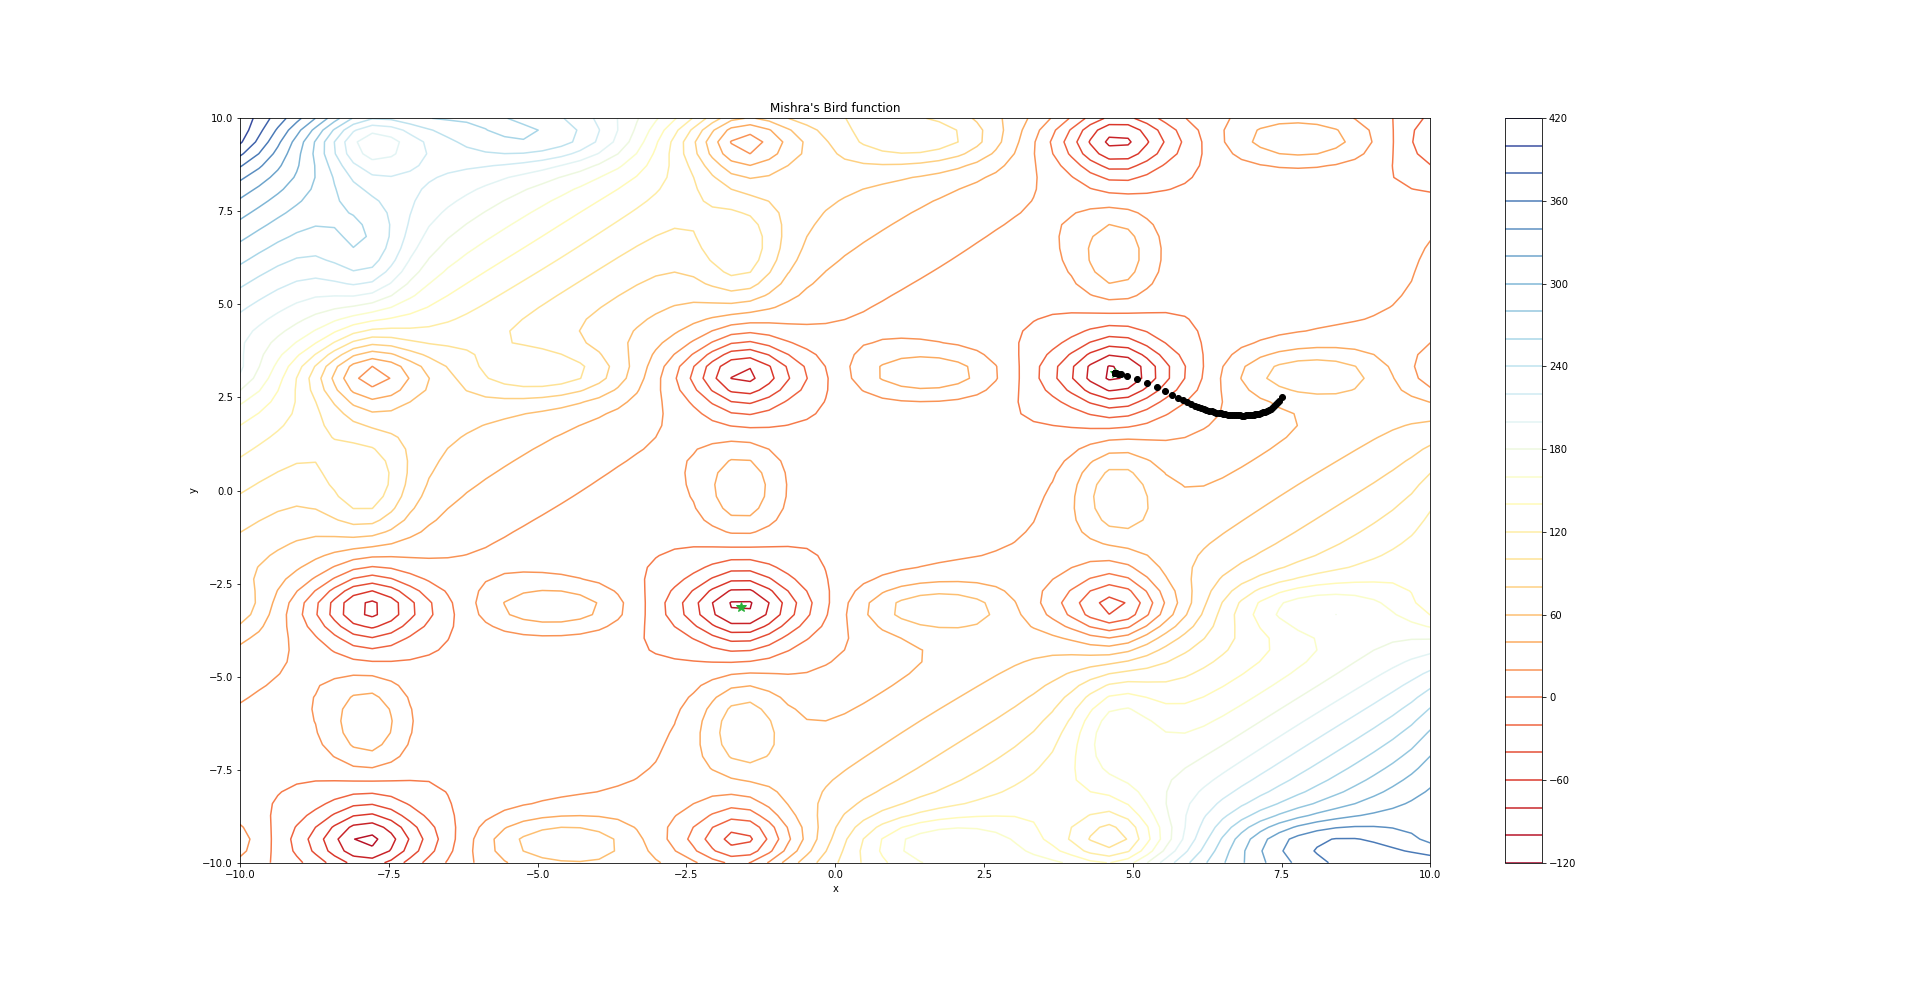

In [53]:
Image("C://Users\이익범\Downloads\Figure_1.png")

# Warm Up Technique

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,exp

def mishraBird(x, y):
    return sin(x)*exp((1-cos(y))**2)+cos(y)*exp((1-sin(x))**2)+(x-y)**2

def mishraGrad(x, y):
    gx = cos(x)*exp((1-cos(y))**2)+cos(y)*exp((1-sin(x))**2)*2*(1-sin(x))*(-cos(x))+2*(x-y)
    gy = sin(x)*exp((1-cos(y))**2)*2*(1-cos(y))*sin(y)-sin(y)*exp((1-sin(x))**2)+2*(y-x)
    return np.array((gx, gy))


N = 64

XYlim = 10.0
xlist = np.linspace(-XYlim, XYlim, N)
ylist = np.linspace(-XYlim, XYlim, N)
X, Y = np.meshgrid(xlist, ylist)
Z = mishraBird(X,Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 30, cmap='RdYlBu')
cbar = fig.colorbar(CS)
#Mishra's Bird has 2 global minimas (can be found with lots of hand-calculations)
plt.plot(4.70104,3.15294,'*',color = '#28B038',markersize=10)
plt.plot(-1.58214,-3.13024,'*',color = '#28B038',markersize=10)


plt.title("Mishra's Bird function")
plt.xlabel('x')
plt.ylabel('y')


M = 50

#set starting point
#z_curr = np.array((-2.6, 4.5))
z_curr = np.array((7.5, 2.5))

plt.plot(z_curr[0], z_curr[1], 'ko')
step_size = 0.001

for ii in range(M):
    z_curr = z_curr - step_size*mishraGrad(*z_curr)
    plt.plot(z_curr[0], z_curr[1], 'ko')
    step_size += 0.0001
    plt.pause(0.5)
plt.show()

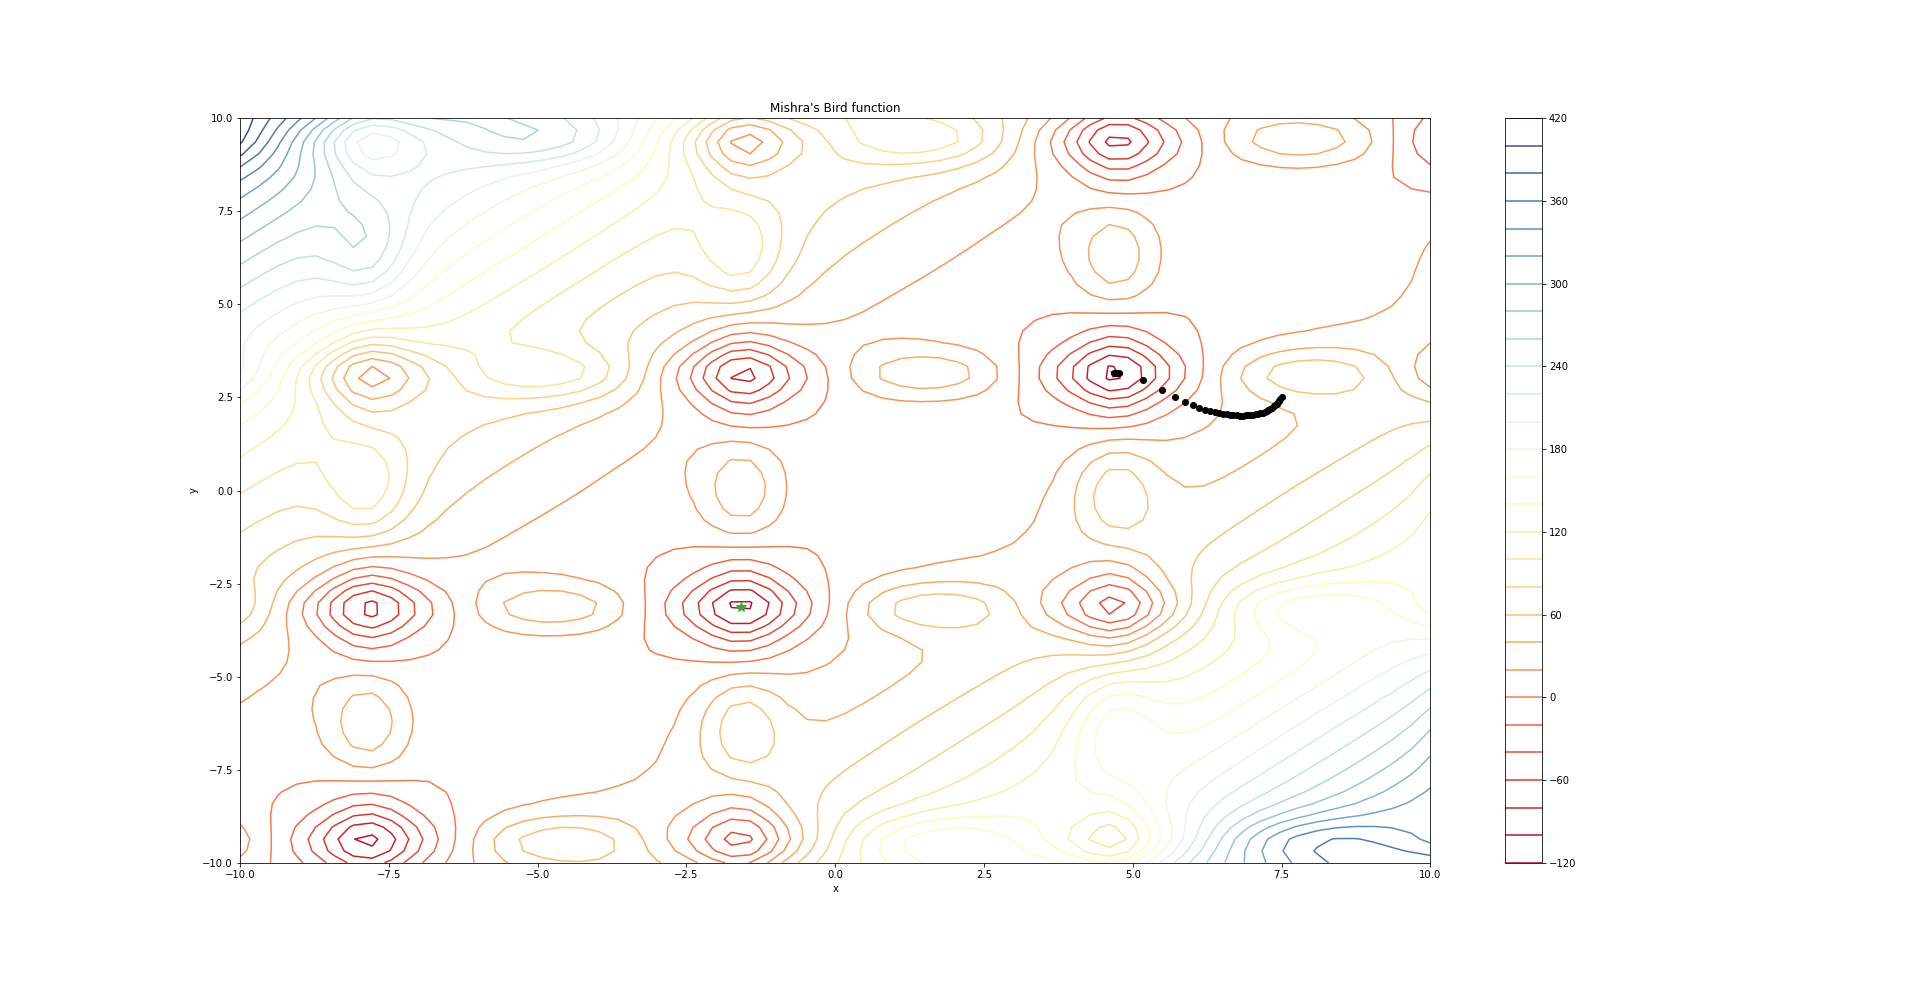

In [48]:
from IPython.display import Image
 
Image("C://Users\이익범\Downloads\Warm_Up_Figure.png") # code안에서 나오게 할 때
#![title](img/picture.png) # markdown안에서 나오게 할때 사용